In [1]:
import pandas as pd
import regex as reg
import seaborn as sns
import matplotlib.pyplot as plt
import string
import contractions
import pickle as pk
import spacy as sp

In [2]:
df=pd.read_csv("train.txt",names=['text','emotion'],sep=';')
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [4]:
# for i in range(df.shape[0]):
#     if (df.loc[i][0]=='empty') | (df.loc[i][0]=='neutral'):
#          df.loc[i][0]='normal'
#     elif (df.loc[i][0]=='anger') | (df.loc[i][0]=='hate'):
#          df.loc[i][0]='hatred'
#     elif (df.loc[i][0]=='love') | (df.loc[i][0]=='surprise') | (df.loc[i][0]=='fun') | (df.loc[i][0]=='relief') | (df.loc[i][0]=='enthusiasm'):
#          df.loc[i][0]='happiness'
#     elif (df.loc[i][0]=='worry') | (df.loc[i][0]=='boredom'):
#          df.loc[i][0]='sadness'

In [5]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
word_net=WordNetLemmatizer()

In [6]:
stop_words=stop_words.difference({'not'})

In [7]:
def clean(text):
    # expand the contractions
    text=contractions.fix(text)

    # removing URL
    url_pattern = reg.compile(r'https?://\S+|www\.\S+')
    text=url_pattern.sub(r'', text)
    #text=reg.sub('[a-z]+://[a-z]+\.[a-z]+/[a-z0-9]+','',text)
    
    # removing punctuations
    text=reg.sub('[%s]' % reg.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    #text=reg.sub("!|\"|#|$|%|&|\|'|(|)|\*|\+|,|-|\.|/|:|;|<|=|>|\?|@|[|\|\|]|^|_|`|{|}|~|'",'',text)
    
    # removing extra spaces
    text=text.strip()
    text=reg.sub('\s+',' ',text)
    
    # removing digits
    text=reg.sub('[0-9]','',text)
    
    # lowering the case
    text=text.lower()
    text=text.strip()
    # lemmatizing the text
    tokens=text.split(' ')
    tokens_lemmatize=[word_net.lemmatize(w) for w in tokens if w not in stop_words]
    
    # remove unneccessary words
    extra_words=set({'day','today','tomorrow','week','weekend','go','going','still','time','back','tonight','got','really','home','twitter','one','think','need','amp','last'})
    tokens_lemmatize_clnd=[w for w in tokens_lemmatize if w not in extra_words]

    # removing the word with length less than 2
    tokens_cleaned=[]
    for i in tokens_lemmatize_clnd:
        if (len(i)>2) & (len(i)<12):
            tokens_cleaned.append(i)
    if len(tokens_cleaned)>2:
        string=' '.join(tokens_cleaned)
    else:
        string=np.nan
    
    
    return ' '.join(tokens_cleaned)

In [8]:
import numpy as np

In [9]:
df['text']=df['text'].apply(lambda x:clean(x))

In [10]:
df

,text,emotion
0,not feel humiliated,sadness
1,feeling hopeless damned hopeful around someone...,sadness
2,grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know property,love
4,feeling grouchy,anger
...,...,...
15995,brief beanbag said anna feel like beaten,sadness
15996,turning feel pathetic waiting table subbing te...,sadness
15997,feel strong good overall,joy
15998,feel like rude comment glad,anger


In [11]:
import numpy as np
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

In [12]:
remove_small_sentences(df)

In [13]:
df.dropna(inplace=True)

In [14]:
df['no_of_words']=df['text'].apply(lambda x:len(x.split()))

In [15]:
df['no_of_characters']=df['text'].apply(lambda x:len(reg.sub(' ','',x)))

In [16]:
df['characters/word']=df['no_of_characters']/df['no_of_words']

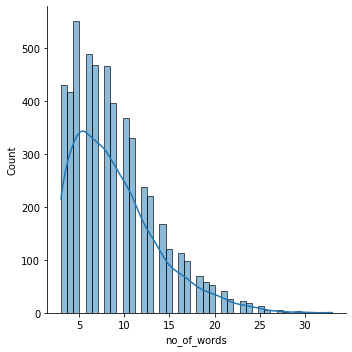

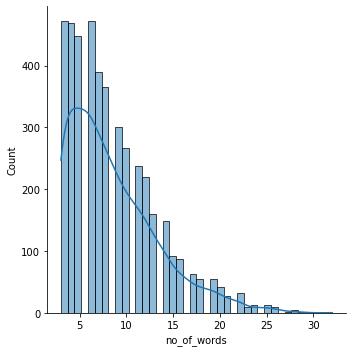

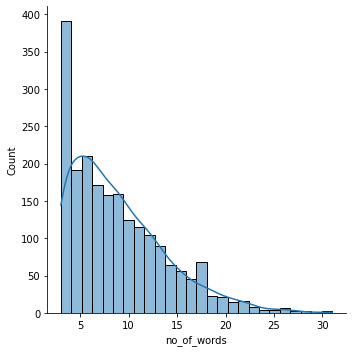

In [17]:
sns.displot(df[df['emotion']=='joy']['no_of_words'],kde=True)
sns.displot(df[df['emotion']=='sadness']['no_of_words'],kde=True)
sns.displot(df[df['emotion']=='anger']['no_of_words'],kde=True)

In [18]:
def unique_words(df,emotion):
    my_set=set({})
    for i in df[df['emotion']==emotion]['text']:
        for i in i.split(' '):
            my_set.add(i)
    return my_set

In [19]:
joy_words=unique_words(df,'joy')
fear_words=unique_words(df,'fear')
surprise_words=unique_words(df,'surprise')
love_words=unique_words(df,'love')
anger_words=unique_words(df,'anger')
sad_words=unique_words(df,'sadness')

In [20]:
pip install wordcloud


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Akshay\anaconda3\python.exe -m pip install --upgrade pip


In [21]:
from wordcloud import WordCloud
def plot_wordcloud(string):
    word_cloud=WordCloud(width=300,height=300,min_font_size=10).generate(string)
    plt.figure(figsize=(12,8))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

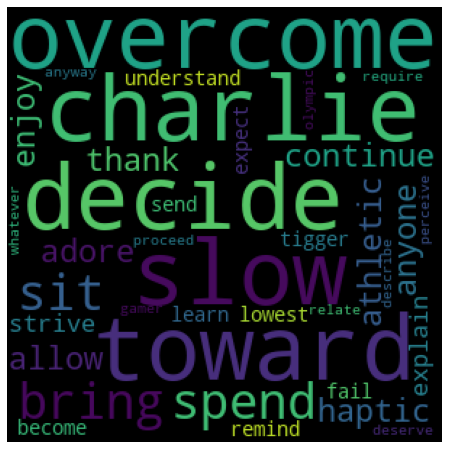

In [22]:
plot_wordcloud(' '.join(joy_words))

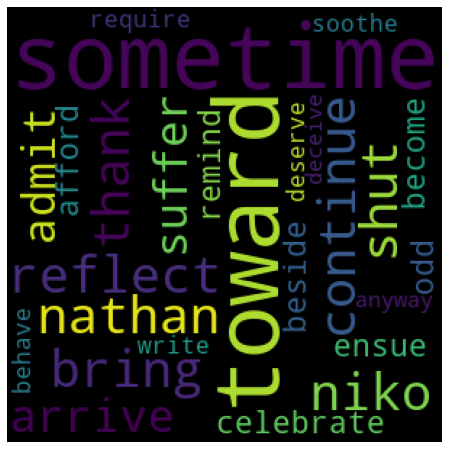

In [23]:
plot_wordcloud(' '.join(sad_words))

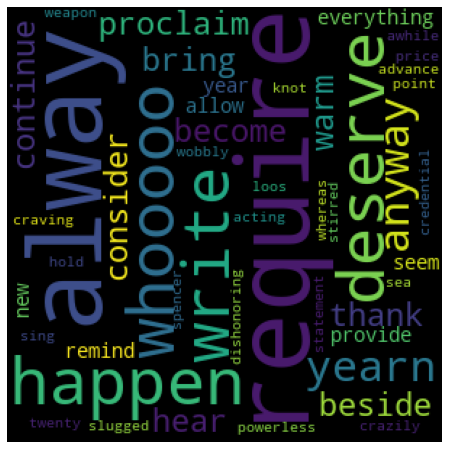

In [24]:
plot_wordcloud(' '.join(fear_words))

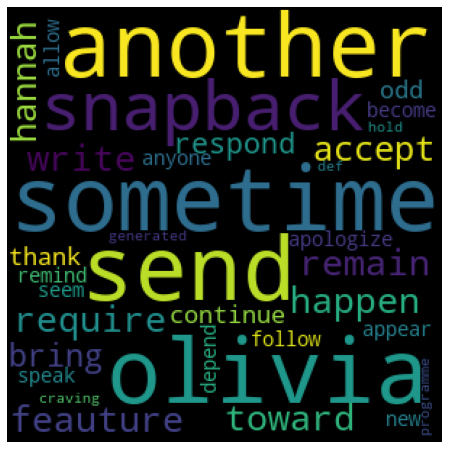

In [25]:
plot_wordcloud(' '.join(anger_words))

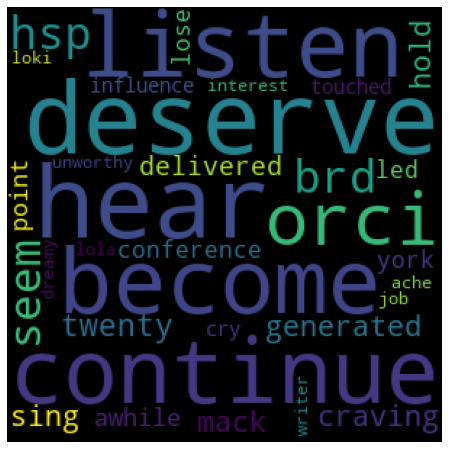

In [26]:
plot_wordcloud(' '.join(surprise_words))

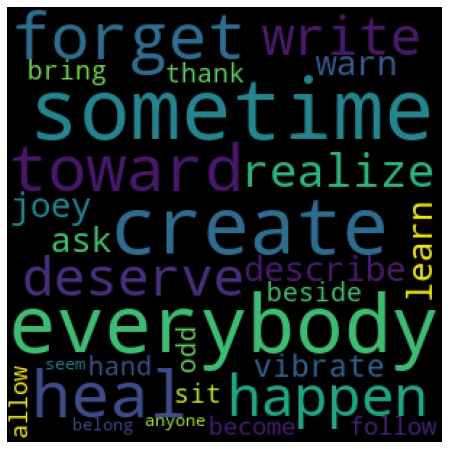

In [27]:
plot_wordcloud(' '.join(love_words))

In [28]:
def common_ratio(df,emotion):
    my_set1=set(' '.join(df[df['emotion']==emotion]['text']).split(' '))
    
    for i in set(df['emotion'].unique()).difference({emotion}):
        my_set2=set(' '.join(df[df['emotion']==i]['text']).split(' '))
        common_words=len(my_set1.intersection(my_set2))
        print('{} : {} \t {} : {} '.format(i,common_words/sum(df[df['emotion']==i]['no_of_words']),emotion,common_words/sum(df[df['emotion']==emotion]['no_of_words'])))
        

In [29]:
common_ratio(df,'love')

anger : 0.09037661484563171 	 love : 0.13927788088408977 
surprise : 0.20126282557221783 	 love : 0.08604690399865024 
sadness : 0.053063155404872664 	 love : 0.1703222540914459 
fear : 0.10029717682020803 	 love : 0.13666272988020922 
joy : 0.04742794600510763 	 love : 0.18643495866374218 


In [30]:
unique_joy_words=joy_words.difference(surprise_words).difference(love_words).difference(fear_words).difference(sad_words).difference(anger_words)

In [31]:
unique_sad_words=sad_words.difference(surprise_words).difference(love_words).difference(fear_words).difference(joy_words).difference(anger_words)

In [32]:
unique_anger_words=anger_words.difference(surprise_words).difference(love_words).difference(fear_words).difference(sad_words).difference(joy_words)

In [33]:
unique_fear_words=fear_words.difference(surprise_words).difference(love_words).difference(joy_words).difference(sad_words).difference(anger_words)

In [34]:
unique_surprise_words=surprise_words.difference(joy_words).difference(love_words).difference(fear_words).difference(sad_words).difference(anger_words)

In [35]:
unique_love_words=love_words.difference(surprise_words).difference(joy_words).difference(fear_words).difference(sad_words).difference(anger_words)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf=TfidfVectorizer()
X=Tfidf.fit_transform(df['text']).toarray()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,df['emotion'],test_size=0.1)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',random_state=0)

In [57]:
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(Y_test,lr.predict(X_test))

0.8506493506493507

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=60)

In [60]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=60, n_estimators=200)

In [64]:
y_pred1=rf.predict(X_test)

In [65]:
accuracy_score(Y_test,y_pred1)

0.7538961038961038

In [66]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
mnb=MultinomialNB()
gb=GaussianNB()
gb.fit(X_train,Y_train)


GaussianNB()

In [67]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [68]:
y_pred2=mnb.predict(X_test)

In [69]:
accuracy_score(Y_test,y_pred2)

0.6577922077922078

In [70]:
with open('mnb','wb') as files:
    pk.dump(mnb,files)
with open('rf','wb') as files:
    pk.dump(rf,files)
with open('lr','wb') as files:
    pk.dump(lr,files)

In [50]:
json.dump(Tfidf.vocabulary_, open('vocabulary.json', mode = 'w'))

In [52]:
idf=Tfidf.idf_

In [55]:
pk.dump(idf,open('idf.pkl','wb'))

In [63]:
pk.dump(Tfidf, open('tfidf.pkl', mode = 'wb'))